In [1]:
import numpy as np
import pylab as pl
import scipy as sp
import pandas as pd

In [3]:
anime_recommand_raw = pd.read_csv("./data/anime_recommend.csv")
rating_recommand_raw = pd.read_csv("./data/rating_recommend.csv")
data_anime_raw = pd.read_csv("./data/dataanime.csv")

In [4]:
anime_recommand_raw.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [31]:
rating_recommand_raw.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [6]:
data_anime_raw.head()

,Title,Type,Episodes,Status,Start airing,End airing,Starting season,Broadcast time,Producers,Licensors,Studios,Sources,Genres,Duration,Rating,Score,Scored by,Members,Favorites,Description
0,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,2009-4-5,2010-7-4,Spring,Sundays at 17:00 (JST),"Aniplex,Square Enix,Mainichi Broadcasting Syst...","Funimation,Aniplex of America",Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",24 min. per ep.,R,9.25,719706,1176368,105387,"""In order for something to be obtained, someth..."
1,Kimi no Na wa.,Movie,1,Finished Airing,2016-8-26,-,-,-,"Kadokawa Shoten,Toho,Sound Team Don Juan,Lawso...","Funimation,NYAV Post",CoMix Wave Films,Original,"Supernatural,Drama,Romance,School",1 hr. 46 min.,PG-13,9.19,454969,705186,33936,"Mitsuha Miyamizu, a high school girl, yearns t..."
2,Gintama°,TV,51,Finished Airing,2015-4-8,2016-3-30,Spring,Wednesdays at 18:00 (JST),"TV Tokyo,Aniplex,Dentsu","Funimation,Crunchyroll",Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24 min. per ep.,R,9.16,70279,194359,5597,"Gintoki, Shinpachi, and Kagura return as the f..."
3,Steins;Gate 0,TV,23,Currently Airing,2018-4-12,-,Spring,Thursdays at 01:35 (JST),Nitroplus,Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",23 min. per ep.,PG-13,9.16,12609,186331,1117,The dark untold story of Steins;Gate that lead...
4,Steins;Gate,TV,24,Finished Airing,2011-4-6,2011-9-14,Spring,Wednesdays at 02:05 (JST),"Frontier Works,Media Factory,Movic,AT-X,Kadoka...",Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",24 min. per ep.,PG-13,9.14,552791,990419,90365,The self-proclaimed mad scientist Rintarou Oka...


## Filter the anime

In [8]:

# Select only the anime in the dataset data_anime
anime_id_selected = []

for title in data_anime_raw['Title']:
    current_id = anime_recommand_raw[anime_recommand_raw['name'] == title]['anime_id'].values
    if len( current_id ) > 0:
        anime_id_selected.append( current_id[0] )

In [9]:
anime_id_selected.sort()
anime_id_selected = np.array(anime_id_selected)

In [12]:
anime_id_selected.shape

(1342,)

In [13]:
anime_id_selected

array([    1,     5,     6, ..., 34349, 34445, 34514], dtype=int64)

## Get the rating of the selected animes from the first 5000 users

In [37]:
import os
file_exists = os.path.exists("./data/rating_table.csv")
if not file_exists:
    rating_table = np.full( (5000, len(anime_id_selected)), -1 )
    for index, row in rating_recommand_raw.iterrows():
        if row['user_id'] >= 5000:
            break
        if row['anime_id'] in anime_id_selected:
            rating_table[ row['user_id'] - 1 , np.where( anime_id_selected == row['anime_id'] )[0] ] = row['rating']
    pd.DataFrame(rating_table, columns = list(anime_id_selected) ).to_csv("./data/rating_table.csv")

In [38]:
rating_table_df = pd.read_csv("./data/rating_table.csv", index_col = 0)

In [39]:
rating_table_df

,1,5,6,15,16,17,18,20,21,24,...,33988,34076,34103,34136,34240,34284,34299,34349,34445,34514
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,-1,-1,-1,-1,-1,-1,-1,8,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,-1,-1,8,6,-1,6,6,6,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4996,-1,-1,7,-1,10,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4997,10,-1,8,-1,7,-1,-1,-1,-1,9,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4998,-1,-1,-1,-1,-1,-1,-1,-1,-1,9,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


## Dimension Reduction

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=120)

In [42]:
rating_table = np.array( rating_table_df )

In [43]:
pca.fit(rating_table)

PCA(n_components=120)

In [44]:
pca.explained_variance_[:] 

array([467.3470925 , 100.59931433,  83.56536955,  74.92808575,
        70.42453916,  51.10670835,  39.626582  ,  37.20907846,
        34.80538193,  30.90098361,  29.77010293,  25.74720997,
        24.03798017,  23.50127043,  21.9375232 ,  21.00202336,
        20.03743919,  19.4973149 ,  18.75238964,  17.91391474,
        17.34613491,  17.18324286,  16.95778749,  16.31352454,
        16.12838753,  15.30541368,  15.02590516,  14.90647968,
        14.74948479,  14.53480321,  14.18510172,  14.09197349,
        13.90633045,  13.60881064,  13.47753293,  13.29327337,
        13.02097757,  12.88150715,  12.82864064,  12.68719406,
        12.13642766,  12.10081881,  11.88806185,  11.65750935,
        11.49318855,  11.44306034,  11.36498983,  11.02179082,
        10.99216039,  10.88622751,  10.81441105,  10.53655806,
        10.46826025,  10.40240744,  10.26215854,  10.20223343,
        10.12847193,  10.03924398,   9.94279407,   9.82792387,
         9.7694305 ,   9.63436989,   9.56107827,   9.51

In [45]:
rating_table_pca = pca.transform(rating_table)

In [46]:
pca.score(rating_table) 

-1990.0453996888698

In [48]:
pca.transform(rating_table).shape

(5000, 120)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [1342] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [502] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


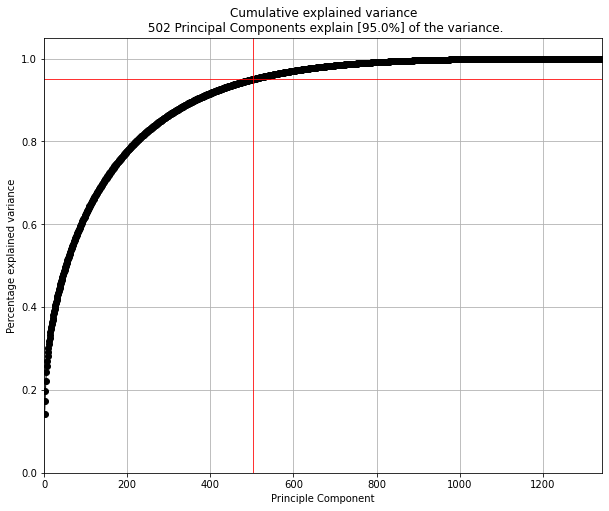

<Figure size 432x288 with 0 Axes>

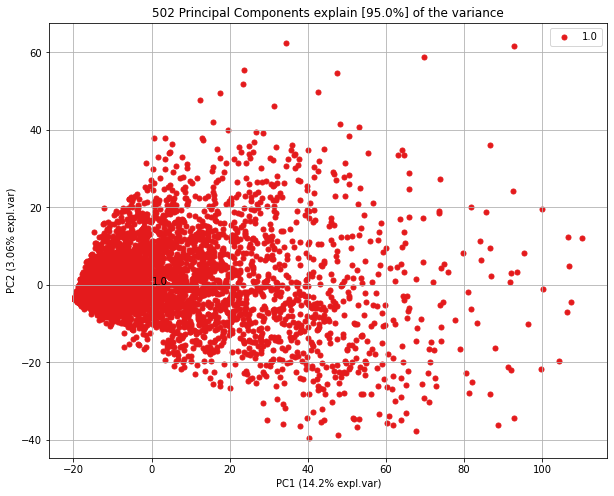

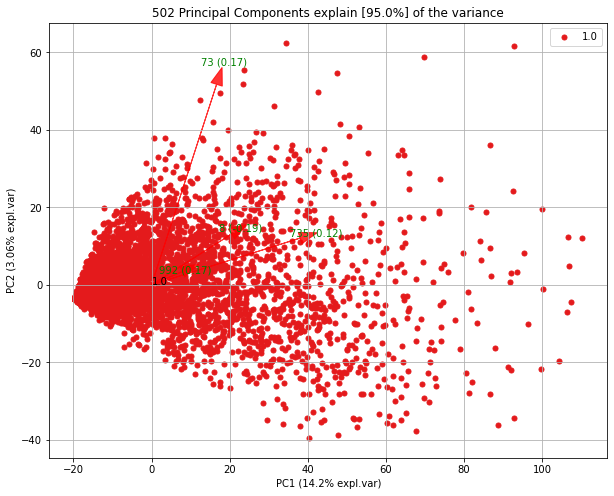

In [55]:
from pca import pca

# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
model = pca(n_components=0.95)

# Or reduce the data towards 2 PCs
# model = pca(n_components=2)

# Fit transform
results = model.fit_transform(rating_table)

# Plot explained variance
fig, ax = model.plot()

# Scatter first 2 PCs
fig, ax = model.scatter()

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=4)

## K means cluster 

In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(rating_table)

In [50]:
kmeans.inertia_ / 5000

2687.81336024321

In [51]:
inertias = np.zeros(30)
for k in range(1,31):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(rating_table)
    inertias[k-1] = kmeans.inertia_ / 5000

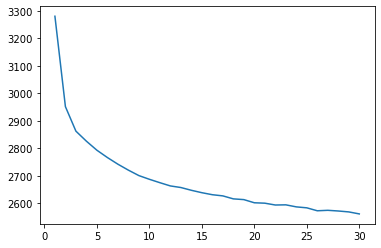

In [52]:
pl.plot(range(1,31), inertias)

In [53]:
from collections import Counter 
Counter( kmeans.predict(rating_table) )

Counter({29: 1915,
         7: 199,
         17: 91,
         19: 133,
         11: 261,
         10: 585,
         13: 395,
         16: 24,
         2: 205,
         5: 56,
         18: 209,
         22: 12,
         20: 55,
         1: 188,
         26: 209,
         25: 102,
         21: 25,
         9: 99,
         6: 2,
         0: 40,
         8: 40,
         14: 54,
         15: 3,
         24: 34,
         12: 52,
         3: 6,
         4: 1,
         23: 2,
         28: 1,
         27: 2})

In [155]:
# def nmf(X, k):
#     """
#     Args:
#         X (np.array, dim: n,m,4): containing the image channel to be processed
#         k (int): the number of elements to be used in the low rank approximation 
    
#     Returns:
#         X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
#     """
    
# #     X_low_rank_approx = np.zeros(X.shape)
# #     for i in range(4):
#     A_0, D, B_0 = np.linalg.svd(X, full_matrices=False)
#     A = np.abs(A_0[:,:k])
#     B = np.abs(B_0[:k,:])

#     for _ in range(65):
#         B = np.nan_to_num(B * (A.T.dot(X))/(A.T.dot(A.dot(B))))
#         A = np.nan_to_num(A * (X.dot(B.T)) / (A.dot(B.dot(B.T))))
#     return A, B